
    
#   <div style="text-align: center;"> Méthodes de Monte Carlo (2023-2024)  </div>
#   <div style="text-align: center;">TP5: Réduction de la variance
  </div>     

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Objectif

On se propose d'implémenter des techniques de simulation telles que l'échantillonnage préférentiel et les variables antithétiques qui visent à réduire la variance de l'estimateur de Monte-Carlo.

# Partie 1: Échantillonnage préférentiel (Importance Sampling)

Il s'agit d'une méthode d'estimation de l'espérance d'une fonction d'une variable aléatoire X, lorsque l'évaluation directe de cette espérance est difficile ou impossible.

$$ \mu = E(X) = E\left( h(X) \frac{\pi(X)}{g(X)} \right)$$

La méthode consiste à tirer des échantillons d'une distribution instrumentale (aussi appelée loi d'importance ou de proposition) notée $g(X)$ qui est plus facile à échantillonner que la distribution d'intérêt (ou la distribution cible) notée $\pi(X)$ . Les échantillons sont pondérés par le rapport entre la densité de probabilité de la distribution cible et celle de la loi instrumentale, appelé poids d'importance.

$$W(i)=\frac{\pi(X(i))}{g(X(i))}$$

La moyenne pondérée des échantillons fournit alors une estimation de l'espérance de la fonction sous la distribution cible.

$$\hat{\mu}= \frac{W(1)h(X(1)) +... + W(m)h(X(m)) }{m}$$

Cette méthode peut être utilisée pour évaluer des intégrales, des probabilités, ou pour effectuer une optimisation stochastique et réduire la variance.


   

In [ ]:
# X suit la loi cible pi(X)


In [ ]:
# vise à concentrer les ressources de simulation là où elles ont le plus d'impact sur l'estimation.


On cherche à estimer $E(e^{-X+ \cos(X)})$.

1- En considérant $X_1, . . . ,X_n$ des réalisations de variables aléatoires i.i.d. suivant la loi de $EXP(1)$, Estimer $\mu$ avec Monte-Carlo naive.
    

In [ ]:
# h(x)= e^(X+cos(X)) donnée


In [ ]:
import numpy as np

# Tâche : Estimer E(e^{-X + cos(X)}) en utilisant Monte Carlo naïve

# Nombre d'échantillons
n = 10000

# Générer n échantillons d'une distribution exponentielle avec lambda=1 (ou (scale=1, size=m))
X = np.random.exponential(1, n)

# Fonctions h(x)
def h(x):
    return np.exp(-x + np.cos(x))

# Calculer la fonction pour chaque échantillon
estimations = h(X)

# Calculer la moyenne (estimateur de Monte Carlo)
estimation_mc_naive = np.mean(estimations)

# Affichage des résultats
print("Naive Monte Carlo mean:", estimation_mc_naive)


Naive Monte Carlo mean: 1.1650429615466231


In [ ]:
# Si on veut calculer l'écart type
mc_std = np.sqrt(np.var(estimations) / n)
print("Naive Monte Carlo standard deviation:",mc_std )


Naive Monte Carlo standard deviation: 0.008780039545945523


2- Donner une proposition de distribution instrumentale. Utiliser une visualisation pour appuyer votre réponse.

#### Indications :
*1- Visualiser $h(X).pi(X)$*

*2- Analyser la courbe*

*3- proposer une hypothèse initiale*

*4- tracer $g(x)$ à coté de $h(X).pi(X)$*

*5- Générer un ensemble de candidats pour $g(x)$ : Testez différentes
    distributions ou paramètres et comparez les formes visuellement.*
    
*6- Ajuster la fonction (Si $g(x)$ diminue plus rapidement que $h(x)⋅π(x)$,
    réduisez $λ$; si elle diminue plus lentement, augmentez $λ$.)*
    
*7-Évaluer la performance de chaque $g(x)$ : Utilisez une métrique
    comme la variance des estimations pour évaluer la performance.*
    

In [ ]:
# h(x)= e^(-X+cos(X)) donnée
# pi(X)= e^(-X) : distribution cible

# Trouver g(x): la distribution instrumentale ? comment ?

In [ ]:
# - doit être choisie en tenant compte de la distribution cible.
# - similaire à la distribution cible, en particulier dans les régions où la fonction d'intérêt a des valeurs élevées.
# - Choisissez une distribution à partir de laquelle il est facile de générer des échantillons.
# - la distribution instrumentale g(x) couvre efficacement les régions où la fonction d'intérêt a des valeurs significatives.


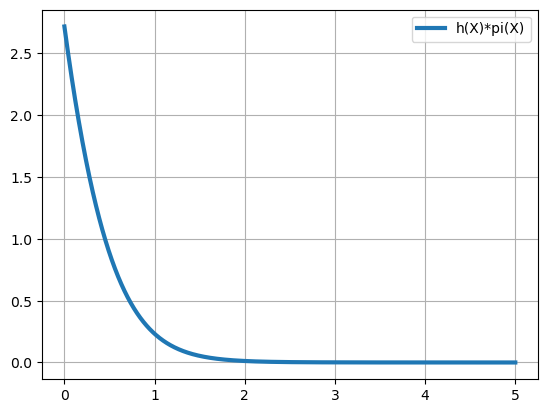

In [ ]:
#Comment trouver g(X)
# astuce: plot h(X)*pi(X) et trouver une fonction qui lui est proche

import matplotlib.pyplot as plt

x_values = np.linspace(0, 5, 1000)

def pi(x):
    return np.exp(-x)

plt.plot(x_values, h(x_values)*pi(x_values), label='h(X)*pi(X)', linewidth=3)


plt.legend()
plt.grid(True)
plt.show()


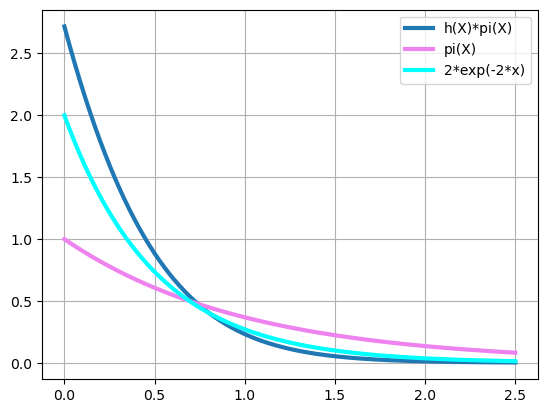

In [ ]:
# graph
x_values = np.linspace(0, 2.5, 1000)

plt.plot(x_values, h(x_values)*pi(x_values), label='h(X)*pi(X)', linewidth=3)
plt.plot(x_values, pi(x_values), label='pi(X)', color='violet', linewidth=3)
plt.plot(x_values, 2 * np.exp(-2 * x_values), label='2*exp(-2*x)', color='cyan', linewidth=3)

plt.legend()
plt.grid(True)
plt.show()





3- Calculer les poids d'importance.



In [ ]:
# Importance Sampling

# Génération des échantillons avec une distribution exponentielle
# X = np.random.exponential(scale=1/2, size=m)
def g(x):
    return 2 * np.exp(-2 * x)


weights= pi(X)/ g(X)

4- Donner une estimation de $\mu$ avec la méthode d'échantillonnage préférentiel. Comparer le résultat avec celui de Monte Carlo naive.

In [ ]:
mu = weights*h(X)

mu_hat= np.mean(mu)

# Affichage des résultats
print("Estimated mu:", mu_hat)
print("Standard deviation of mu:", np.sqrt(np.var(mu) / n))

Estimated mu: 1.1600083533391614
Standard deviation of mu: 0.0026512642065669384
